In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
data = pd.read_csv("car.csv")
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [63]:
data.shape

(301, 9)

In [64]:
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [65]:
# There are 26 columns in this dataset, 
# so it is very important to check whether or not this dataset contains 
# null values before going any further:
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [66]:
# So this dataset doesn’t have any null values, now let’s look at some of the other important insights to get 
# an idea of what kind of data we’re dealing with:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [67]:
print(data.describe())

              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    2003.000000       0.320000     500.000000    0.000000       0.100000
25%    2012.000000       1.200000   15000.000000    0.000000       0.900000
50%    2014.000000       6.400000   32000.000000    0.000000       3.600000
75%    2016.000000       9.900000   48767.000000    0.000000       6.000000
max    2018.000000      92.600000  500000.000000    3.000000      35.000000


In [68]:
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12096\4259428575.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Selling_Price)


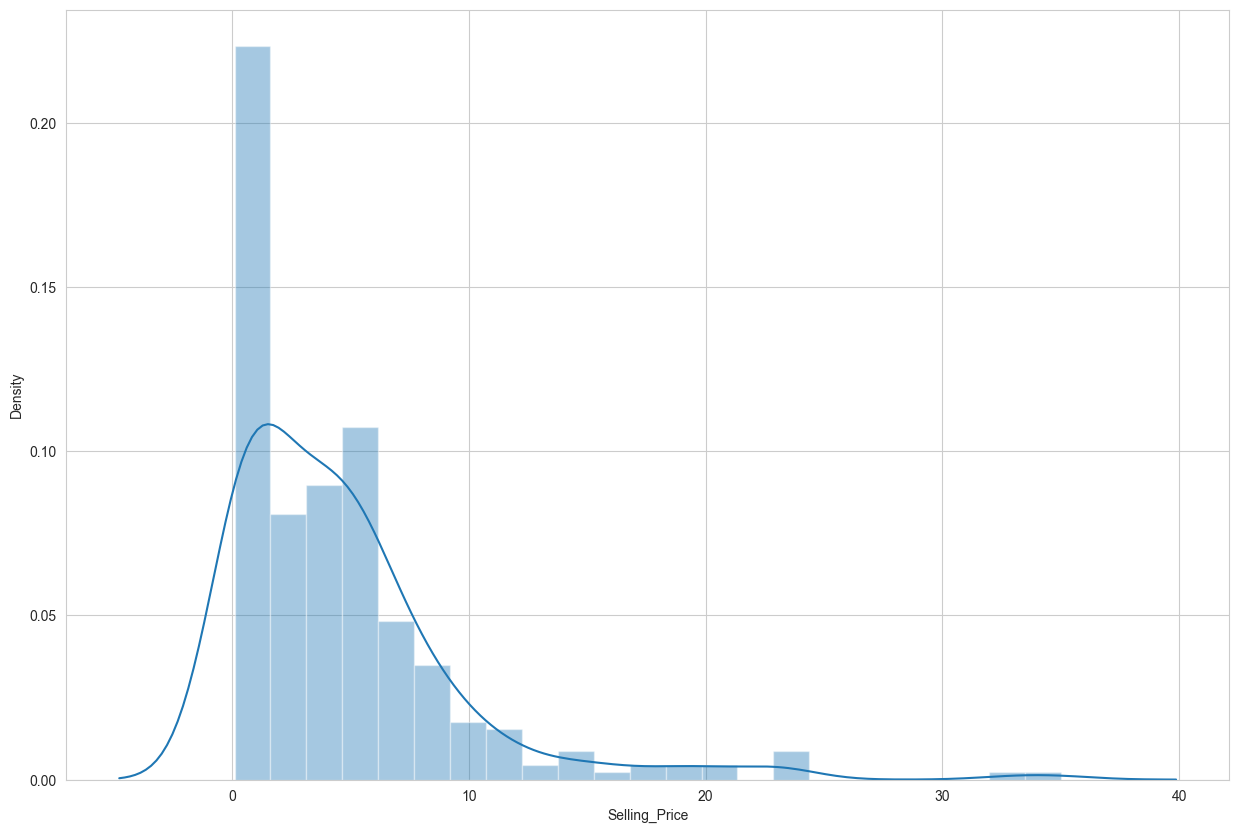

In [69]:
#The price column in this dataset is supposed to be the column whose values we need to predict. 
# So let’s see the distribution of the values of the price column:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Selling_Price)
plt.show()

In [70]:
# Now let’s have a look at the correlation among all the features of this dataset:
print(data.corr())

                   Year  Present_Price  Kms_Driven     Owner  Selling_Price
Year           1.000000      -0.047584   -0.524342 -0.182104       0.236141
Present_Price -0.047584       1.000000    0.203647  0.008057       0.878983
Kms_Driven    -0.524342       0.203647    1.000000  0.089216       0.029187
Owner         -0.182104       0.008057    0.089216  1.000000      -0.088344
Selling_Price  0.236141       0.878983    0.029187 -0.088344       1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12096\3575784592.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12096\4130762916.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


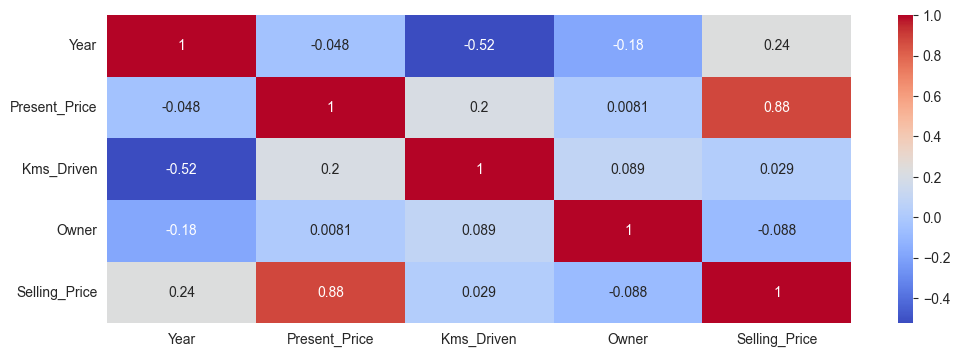

In [71]:
plt.figure(figsize=(12, 4))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [72]:
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [73]:
# Training a Car Price Prediction Model
# I will use the decision tree regression algorithm to train a car price prediction model. 
# So let’s split the data into training and test sets and use the decision tree regression algorithm to train the model:
predict = "Selling_Price"
data = data[["Year", "Kms_Driven", 
             "Present_Price", "Fuel_Type", "Transmission", 
             "Owner", "Selling_Price"]]

In [74]:
data.head()

,Year,Kms_Driven,Present_Price,Fuel_Type,Transmission,Owner,Selling_Price
0,2014,27000,5.59,Petrol,Manual,0,3.35
1,2013,43000,9.54,Diesel,Manual,0,4.75
2,2017,6900,9.85,Petrol,Manual,0,7.25
3,2011,5200,4.15,Petrol,Manual,0,2.85
4,2014,42450,6.87,Diesel,Manual,0,4.60


In [75]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12096\1921883088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12096\1921883088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transmission'] = le.fit_transform(data.Transmission.values)


,Year,Kms_Driven,Present_Price,Fuel_Type,Transmission,Owner,Selling_Price
0,2014,27000,5.59,2,1,0,3.35
1,2013,43000,9.54,1,1,0,4.75
2,2017,6900,9.85,2,1,0,7.25
3,2011,5200,4.15,2,1,0,2.85
4,2014,42450,6.87,1,1,0,4.60


In [87]:
#Petrol=2, Diesel=1, CNG=0
data.Fuel_Type.unique()

array([2, 1, 0])

In [88]:
#Manual=1, Automatic=0
data.Transmission.unique()

array([1, 0])

In [91]:
#First=0, Second=1, Fourth=3
data.Owner.unique()

array([0, 1, 3], dtype=int64)

In [76]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12096\49942920.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [77]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [78]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [79]:
predictions = model.predict(xtest)

In [80]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print("MAE: ", mean_absolute_error(ytest, predictions))
print("MSE Score: ", mean_squared_error(ytest, predictions))
print("R2 Score: ", r2_score(ytest, predictions)*100)

MAE:  0.6188524590163934
MSE Score:  1.152995081967213
R2 Score:  93.02493926025454


In [82]:
input=[[2016,30000,6.87,1,1,0,0]]
price = model.predict(input)
price

array([4.6])

In [83]:
import pickle
pickle.dump(model,open("car_price_predictor_model.pkl","wb"))